In [2]:
# coding:utf-8
from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display
import os
import numpy as np
import pandas as pd
import xgboost as xgb
import math
from sklearn.preprocessing import  StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import StratifiedShuffleSplit
from math import sqrt
x=np.load('D:/ser/Train/opensmile_features384.npy')
x_test=np.load('D:/ser/Test/opensmile_features1582.npy')
X=x.astype(float)
y=np.loadtxt('D:/ser/Train/P_Train_27KB.txt')
y=np.array(y)
y=pd.DataFrame(y,columns=['id','P'])
s=y.P
Y=np.array(s)
# y=np.loadtxt('D:/ser/Train/P_Train_27KB.txt')
# y=np.array(y)
# y=pd.DataFrame(y,columns=['id','P'])
# s=y.P
# Y=np.array(s)

from  sklearn.model_selection  import  train_test_split
print X.shape
Y=Y.reshape(-1,1)

le1=scale(X, axis=0, with_mean=True,with_std=True,copy=True)
le=MinMaxScaler(feature_range=(-3,3))
le.fit(Y)
Y=le.transform(Y)
print Y.shape
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2,random_state=0)
plt.plot(Y,c='b')

plt.title('P_Train')
plt.legend(['Y'])



SyntaxError: Missing parentheses in call to 'print'. Did you mean print(X.shape)? (<ipython-input-2-dc84db9f0c02>, line 35)

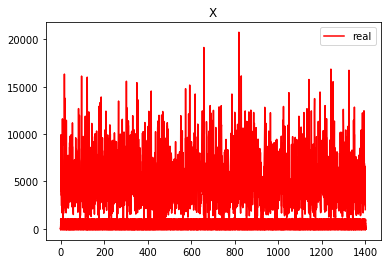

In [27]:
le.fit(X)
Y=le.transform(X)
plt.plot(X,c='r')

plt.title('X')
plt.legend(['real'])

In [61]:
import matplotlib.pyplot as plt
import numpy.random as npr
from datetime import datetime
def calcMean(x,y):
    sum_x = sum(x)
    sum_y = sum(y)
    n = len(x)
    x_mean = float(sum_x+0.0)/n
    y_mean = float(sum_y+0.0)/n
    return x_mean,y_mean
def col(x,y):
    x_mean,y_mean = calcMean(x,y)	#计算x,y向量平均值
    n = len(x)
    sumTop = 0.0
    sumBottom = 0.0
    x_pow = 0.0
    y_pow = 0.0
    for i in range(n):
        sumTop += (x[i]-x_mean)*(y[i]-y_mean)
    for i in range(n):
        x_pow += math.pow(x[i]-x_mean,2)
    for i in range(n):
        y_pow += math.pow(y[i]-y_mean,2)
    sumBottom = math.sqrt(x_pow*y_pow)
    p = sumTop/sumBottom
    return p
    pSum = sum([vector1[i] * vector2[i] for i in range(len(vector1))])
    num = pSum - (sum1 * sum2 / len(vector1))
    den = sqrt((sum1Sq - pow(sum1, 2) / len(vector1)) * (sum2Sq - pow(sum2, 2) / len(vector1)))
    if den == 0: return 0.0
    return 1.0 - num / den


import numpy as np
import pandas as pd
# data precession
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
# model
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


class Ensemble(object):
    def __init__(self, n_splits, stacker, base_models):
        self.n_splits = n_splits
        self.stacker = stacker
        self.base_models = base_models

    def fit_predict(self, X, y, T):
        X = np.array(X)
        y = np.array(y)
        T = np.array(T)

        folds = list(KFold(n_splits=self.n_splits, shuffle=True, random_state=2016).split(X, y))

        S_train = np.zeros((X.shape[0], len(self.base_models)))
        S_test = np.zeros((T.shape[0], len(self.base_models)))
        for i, clf in enumerate(self.base_models):

            S_test_i = np.zeros((T.shape[0], self.n_splits))

            for j, (train_idx, test_idx) in enumerate(folds):
                X_train = X[train_idx]
                y_train = y[train_idx]
                X_holdout = X[test_idx]
                y_holdout = y[test_idx]
                print ("Fit Model %d fold %d" % (i, j))
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_holdout)[:]

                S_train[test_idx, i] = y_pred
                S_test_i[:, j] = clf.predict(T)[:]
            S_test[:, i] = S_test_i.mean(axis=1)

        # results = cross_val_score(self.stacker, S_train, y, cv=5, scoring='r2')
        # print("Stacker score: %.4f (%.4f)" % (results.mean(), results.std()))
        # exit()

        self.stacker.fit(S_train, y)
        res = self.stacker.predict(S_test)[:]
        return res


# rf params
rf_params = {}
rf_params['n_estimators'] = 50
rf_params['max_depth'] = 8
rf_params['min_samples_split'] = 100
rf_params['min_samples_leaf'] = 30

# xgb params
xgb_params = {}
# xgb_params['n_estimators'] = 50
xgb_params['min_child_weight'] = 12
xgb_params['learning_rate'] = 0.37
xgb_params['max_depth'] = 6
xgb_params['subsample'] = 0.77
xgb_params['reg_lambda'] = 0.8
xgb_params['reg_alpha'] = 0.4
xgb_params['base_score'] = 0
# xgb_params['seed'] = 400
xgb_params['silent'] = 1

# lgb params
lgb_params = {}
# lgb_params['n_estimators'] = 50
lgb_params['max_bin'] = 8
lgb_params['min_bin'] = 1
lgb_params['min_data_in_bin'] = 1
lgb_params['learning_rate'] = 0.37  # shrinkage_rate
lgb_params['metric'] = 'l1'  # or 'mae'
lgb_params['sub_feature'] = 0.35
lgb_params['bagging_fraction'] = 0.85  # sub_row
lgb_params['bagging_freq'] = 40
lgb_params['num_leaves'] = 512  # num_leaf
lgb_params['min_data'] = 500  # min_data_in_leaf
lgb_params['min_hessian'] = 0.05  # min_sum_hessian_in_leaf
lgb_params['verbose'] = 0
lgb_params['feature_fraction_seed'] = 2
lgb_params['bagging_seed'] = 3

# XGB model
xgb_model = XGBRegressor(**xgb_params)

# lgb model
lgb_model = LGBMRegressor(**lgb_params)

# RF model
rf_model = RandomForestRegressor(**rf_params)

# ET model
et_model = ExtraTreesRegressor()

# SVR model
# SVM is too slow in more then 10000 set
svr_model = SVR(kernel='rbf', C=10.0, epsilon=0.01)

# DecsionTree model
dt_model = DecisionTreeRegressor()

# AdaBoost model
ada_model = AdaBoostRegressor()

stack = Ensemble(n_splits=5,
                 stacker=LinearRegression(),
                 base_models=(rf_model, xgb_model, et_model, ada_model))

y_test = stack.fit_predict(train_x, train_y, test_x)

from datetime import datetime
print("submit...")
pre = y_test
from sklearn import metrics

pcc=col(test_y,y_test)
mse=metrics.mean_squared_error(test_y,y_test)
rmse=np.sqrt(mse)
r2=metrics.r2_score(test_y,y_test)
print 'pcc:{}'.format(pcc)
print 'mse:{}'.format(mse)
print 'rmse:{}'.format(rmse)            
print 'r2:{}'.format(r2)






Fit Model 0 fold 0


C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:79: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Fit Model 0 fold 1
Fit Model 0 fold 2
Fit Model 0 fold 3
Fit Model 0 fold 4
Fit Model 1 fold 0
Fit Model 1 fold 1
Fit Model 1 fold 2
Fit Model 1 fold 3
Fit Model 1 fold 4
Fit Model 2 fold 0
Fit Model 2 fold 1
Fit Model 2 fold 2
Fit Model 2 fold 3
Fit Model 2 fold 4
submit...
pcc:[0.65514614]
mse:0.539502718328
rmse:0.73450848758
r2:0.421861498756


the result of 384 dimensional features
pcc:[0.68017809]
mse:0.509904152872
rmse:0.714075733289
r2:0.453579726839


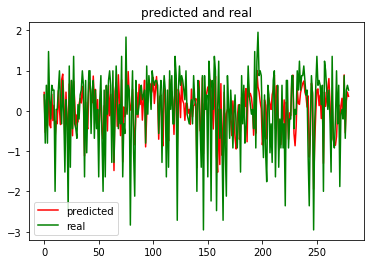

In [44]:
from math import sqrt


from scipy import stats
print "the result of 1582 dimensional features"

def calcMean(x,y):
    sum_x = sum(x)
    sum_y = sum(y)
    n = len(x)
    x_mean = float(sum_x+0.0)/n
    y_mean = float(sum_y+0.0)/n
    return x_mean,y_mean
def pc(x,y):
    x_mean,y_mean = calcMean(x,y)	#计算x,y向量平均值
    n = len(x)
    sumTop = 0.0
    sumBottom = 0.0
    x_pow = 0.0
    y_pow = 0.0
    for i in range(n):
        sumTop += (x[i]-x_mean)*(y[i]-y_mean)
    for i in range(n):
        x_pow += math.pow(x[i]-x_mean,2)
    for i in range(n):
        y_pow += math.pow(y[i]-y_mean,2)
    sumBottom = math.sqrt(x_pow*y_pow)
    p = sumTop/sumBottom
    return p



mse=metrics.mean_squared_error(test_y,y_test)
rmse=np.sqrt(mse)
r2=metrics.r2_score(test_y,y_test)
pcc=stats.pearsonr(test_y,y_test)
pcc1=pc(test_y,y_test)
print 'pcc:{}'.format(pcc1)
print 'mse:{}'.format(mse)
print 'rmse:{}'.format(rmse)            
print 'r2:{}'.format(r2)


plt.plot(y_test,c='r')
plt.plot(test_y,c='g')
plt.title('predicted and real')
plt.legend(['predicted','real'])

In [13]:
x=[8.624476,-36.99769,-10.14224,4.165749,-15.5063,-3.841846,-13.39886,-14.40349,1.999721,-7.6442,-21.7872,1.339085,-9.795901,
9.300078,-31.79269,-3.4836,18.77718,-16.90544,-3.126453,-6.12973,-20.0711,-0.8469534,-7.904229,-17.03166,4.882384,-25.96497,
10.30537,-29.3645,-3.860652,4.867552,-30.87135,-6.327879,-8.664859,-11.83418,18.69477,1.75696,-24.5198,8.604764,-22.81682,
11.03957,-23.86886,-10.59692,-10.61225,-49.73751,-7.598944,-1.166991,-0.4532731,17.00881,-7.533074,-38.02903,-9.917928,-20.86418,
11.65705,-14.20545,-6.466733,-15.59928,-36.50462,-1.097575,-10.93739,2.207201,19.80148,-13.70162,-35.15121,-15.85921,-19.74791,
11.9536,-13.09067,-9.239675,-18.01666,-41.65316,-4.892987,-17.99982,-6.460959,19.12206,-15.30174,-42.07402,-21.71159,-25.54475,
11.86486,-12.94614,-15.96312,-14.41785,-26.15018,1.28666,-17.32297,-12.4489,13.23287,-20.74415,-48.5287,-24.58523,-14.46352,
11.22791,-18.63488,-23.62311,-17.33323,-11.15455,-5.078275,-21.00128,3.193765,11.64429,2.32635,-41.60944,-29.87738,-11.45757,
10.34046,-23.89215,-26.6221,-15.47008,-13.82636,-11.37328,-19.81675,12.26855,9.718179,-6.054316,-29.96533,-23.77465,-16.29604,
9.598682,-27.30041,-21.50041,-12.81454,-7.838529,-0.647053,-17.16089,6.346317,5.405325,10.66751,-21.28429,-11.30612,-12.2904,
8.725794,-32.55893,-22.75925,-8.872239,-6.93039,-7.767815,-20.46687,-12.19913,1.781187,1.6214,-13.75489,-8.878395,-7.611309,
8.257962,-31.28373,-16.51493,-2.203464,0.9512097,-3.856477,-8.995575,2.361237,1.697266,4.715775,-5.774596,-7.895963,-18.46185,
7.920404,-29.78139,-10.43576,-6.705449,-3.218992,0.7902219,-7.147693,4.109154,5.9881,-3.633812,3.625925,5.290383,-10.21688,
7.742184,-28.6077,-11.54432,-2.94787,-8.366136,-13.83298,-3.904083,5.820083,0.4980528,1.044941,-2.371588,2.290506,-4.081481,
7.785622,-30.49501,-14.7403,1.243154,-1.437781,-13.5988,-7.996132,-0.08710444,-3.894576,-12.36708,-0.1948346,3.470653,-7.610864,
7.815077,-31.15471,-12.73319,-1.986048,-6.071246,-6.804832,-3.528705,1.349038,-3.912065,-8.788868,6.150815,7.592251,-5.978617,
9.298225,-24.79632,-4.204268,6.222106,-1.794912,-9.000798,-18.00834,-9.067077,-6.008316,-7.331116,-10.21211,-8.51619,-7.630285,
14.0081,-10.15316,18.47114,16.2596,-3.755118,-16.4204,-26.95666,-29.22757,-39.73597,-21.01518,-19.68715,-13.95841,-13.88435,
17.34798,2.678796,23.35966,12.32336,-8.369751,-22.71523,-39.22324,-19.00697,-24.67694,-10.67591,-26.91454,-22.82708,-17.11317,
21.05774,15.93404,30.77612,8.475334,-22.98505,-10.35152,-35.67495,-3.25212,-20.6153,-24.8508,-25.1807,-35.66012,-15.41266,
22.39025,17.74488,30.40825,-0.5521013,-45.76796,-5.871726,-61.92702,5.593105,-12.54611,-29.02586,-25.33354,-44.98374,-7.673457,
22.97588,17.29579,29.33929,1.713827,-41.65469,7.243415,-62.15218,21.20084,-10.64654,-27.72601,-26.35784,-57.47762,2.26426,
23.15727,16.80274,33.03759,2.740922,-27.94378,8.725516,-62.59737,13.58113,-8.043277,-23.1475,-19.60052,-64.16911,-9.035511,
23.27941,11.60822,29.28767,13.35485,-17.29852,30.86671,-70.90525,-0.1479113,-26.01703,-13.12326,-8.299795,-59.90623,-2.059576,
23.44344,9.036197,29.07403,28.56906,-13.16983,21.24758,-67.60249,-10.1271,-43.68108,-18.64994,5.271304,-41.72496,-1.54406,
23.55587,8.306025,27.28408,29.52979,-16.18066,21.11275,-43.97486,-20.08254,-48.43143,-32.35083,-10.50974,-30.15446,2.454838,
23.66622,8.658997,28.18931,25.68594,-19.70615,25.26355,-38.20591,-25.73772,-49.10527,-35.63633,-16.55293,-22.57456,8.529002,
23.67209,11.57529,29.6366,22.87195,-16.74215,17.27436,-30.39173,-30.93032,-43.11076,-33.38146,-24.12039,-14.97273,2.662668,
23.74859,12.00229,34.81255,29.85002,-30.08139,17.35077,-31.37186,-33.49077,-38.45359,-17.54644,-29.01252,-17.39626,9.050873,
23.7891,13.83452,39.34381,29.44046,-21.3312,10.83903,-43.91631,-32.92363,-30.34774,-18.57417,-26.5641,-16.59833,6.920396,
23.64365,13.76989,40.05603,33.51161,-15.1278,-1.886499,-39.7495,-28.00112,-35.44214,-15.79593,-16.01904,-17.39722,-9.357156,
23.55057,13.38774,38.24481,37.00187,-18.51733,2.070171,-44.06002,-12.41399,-39.38484,-22.0032,-13.73931,-18.98326,-5.955038,
23.42349,12.49293,41.50625,35.4206,-19.54935,8.040133,-44.7028,-10.12249,-38.23705,-21.91989,-20.66516,-26.42204,6.0496,
23.34285,13.60406,41.04255,31.13797,-15.76676,5.857447,-41.6222,-20.01381,-31.07637,-19.47489,-24.54717,-21.2722,7.755956,
23.17869,15.77296,38.97386,30.15538,-5.838901,1.675806,-44.28484,-28.05171,-30.7115,-20.05432,-11.85206,-19.82043,-2.386133,
23.14892,15.80651,39.63767,32.45976,-1.048797,-2.221395,-51.23367,-23.19924,-25.68096,-26.58378,-9.281032,-29.09738,-4.6073,
23.01072,14.25794,43.54477,31.78694,-6.639621,0.9444668,-43.5304,-26.36472,-26.05181,-28.56195,-19.81312,-32.63873,4.516438,
22.92717,12.19443,41.74641,28.80564,-6.077972,9.155778,-52.47668,-26.07185,-37.32557,-34.43699,-12.87164,-31.33572,10.23123,
22.7902,14.60665,41.3747,30.84034,-6.317827,8.366364,-48.32147,-21.28954,-46.28635,-34.38494,-7.371204,-19.36712,1.726548,
22.79485,19.08571,36.5887,32.13161,-1.665766,-8.362953,-42.77983,-24.65864,-31.80889,-23.67055,-11.0763,-15.66539,-17.03966,
22.80489,16.9558,41.27476,31.83112,-10.54138,3.012563,-41.9896,-23.11878,-37.87271,-25.91838,-12.02505,-25.05119,-3.009983,
22.83052,15.9851,42.93667,35.32021,-11.17639,-0.4037969,-44.34165,-16.15139,-42.68067,-27.11341,-11.60863,-24.44041,7.801266,
22.84963,15.42905,44.37333,33.54589,-6.895589,6.03319,-37.59731,-23.52233,-36.17826,-29.84457,-14.92509,-21.44431,-3.144138,
22.74255,17.07352,40.47428,35.67726,-2.138776,-5.429862,-35.15232,-27.94224,-28.285,-25.38721,-26.95983,-10.75833,-4.611611,
22.62121,18.6895,40.32376,33.31651,-3.999423,-4.159062,-34.68977,-29.72471,-35.07204,-26.91317,-17.40547,-17.28167,-0.2931829,
22.39362,20.6075,39.14881,31.32706,-2.247403,-4.786185,-28.8635,-31.23145,-35.26929,-27.54328,-19.06927,-15.38426,0.7424977,
22.11655,18.45259,42.21003,39.36712,0.6641471,-13.5722,-31.37117,-40.10058,-27.97571,-14.81291,-31.27892,-9.299294,-2.678883,
21.44941,19.89711,42.91417,37.08015,-3.252583,-17.69832,-20.8327,-25.46749,-22.35434,-14.93708,-28.4675,-10.23848,-5.981162,
20.38366,15.40423,41.21317,34.67131,4.412115,-10.49899,-18.75721,-22.34651,-18.37162,-6.543167,-24.63832,-17.57502,-5.54196,
18.05392,8.964926,34.08374,25.77379,1.063426,-0.9178476,-9.051157,-25.9521,-26.17402,-21.84932,-17.1999,-20.20369,-14.27569,
15.79864,-3.15219,24.63263,28.90847,9.973921,7.392663,-20.47194,-24.38858,-11.44534,-12.897,-21.06036,-2.063444,-11.30981,
13.39431,-17.58022,12.78261,27.99442,-5.701817,-5.21358,-32.68905,-18.37429,-5.181449,-10.87946,-31.71289,-9.261586,-12.56905,
15.77604,-31.77594,-2.494226,25.46108,0.9299775,23.20775,-40.46772,-4.122245,-3.661205,-14.7389,-30.57419,8.047697,-7.881242,
22.38518,-42.17695,-19.77906,3.000182,-26.06978,20.86025,-48.77121,11.61761,-12.40225,-6.035164,-17.34255,4.069244,-6.813471,
22.94511,-36.61577,-22.35571,9.166808,-29.70401,32.85575,-58.30799,30.4257,-7.538132,-4.218496,-15.58526,7.140841,-0.1696431,
23.6464,-31.35447,-17.07281,8.368989,-35.30093,20.56627,-60.58575,43.14262,-19.2176,5.65259,-26.5127,7.658732,-10.26219,
23.89374,-16.36962,-4.162521,10.28049,-32.91768,20.09482,-61.48103,32.71953,-34.61813,9.520523,-10.32819,-0.8690729,-6.314269,
24.32514,-0.9554404,-14.88257,4.366164,-42.86171,6.103709,-59.00737,1.942573,-31.53836,6.064764,-21.43742,10.73585,-6.349449,
24.64141,-2.809008,-18.8288,0.8250459,-42.37431,0.7498099,-63.48948,-1.785174,-35.34354,-4.451745,-23.48724,1.302964,-13.55607,
24.60629,-5.299353,-19.34518,-1.887874,-39.30021,-2.413562,-51.20092,-6.31926,-31.00449,-3.46007,-23.93943,-0.9717035,-19.7667,
24.53001,-8.411927,-16.40505,-7.327312,-40.26625,-4.969612,-43.2912,-7.096506,-18.76974,-2.490847,-19.97374,-17.47892,-15.89964,
24.47903,-7.351439,-17.21924,-7.537323,-36.28582,-15.17994,-37.76539,-8.567292,-15.23066,-7.589218,-21.11047,-16.22443,-16.52271,
24.40489,-6.56917,-16.89659,-6.277388,-30.5916,-13.29848,-40.84002,-1.454969,-9.574374,-7.182605,-21.62381,-14.70263,-19.32671,
24.42703,-3.543754,-18.98965,-8.565692,-33.32525,-16.49912,-44.29429,3.794497,-14.07681,-3.759113,-30.21693,-19.0295,-22.18411,
24.51716,-0.8945332,-18.0274,-11.92422,-43.20085,-11.94197,-47.02899,0.7106089,-11.81262,-9.284945,-32.65602,-17.43825,-25.12997,
24.44184,0.07413492,-16.20134,-13.15386,-41.69656,-13.43247,-39.53439,0.3383212,-9.929446,-2.691715,-43.7783,-15.56004,-20.32907,
24.22453,2.110159,-16.60294,-8.2948,-36.26919,-6.876076,-51.12144,13.11199,-13.85264,7.08159,-55.57701,-2.097668,-30.68019,
23.88189,-0.5736398,-14.2795,-4.803424,-35.19744,-9.356833,-41.55703,1.413468,-20.72831,3.808085,-51.96833,-16.2857,-23.29973,
23.37055,-4.603377,-8.067073,-2.50621,-24.97993,2.265867,-30.88286,0.121203,-23.68671,-4.568233,-52.40285,-11.85329,-19.76859,
23.05472,-10.48608,-11.69121,13.04082,-2.865896,11.36041,-31.63919,-10.82075,-25.59114,-12.27822,-56.22593,-6.885698,-21.30894,
22.67816,-9.836849,-18.05414,8.654037,-11.81135,25.77044,-27.63526,-10.20816,-17.95028,-14.62522,-62.6609,-16.06861,-33.74404,
22.0371,-12.53451,-19.15856,4.756864,-8.033646,30.34036,-15.88754,2.539827,-25.20532,-20.31346,-61.16515,-9.157874,-34.30198,
21.11116,-13.13903,-28.70578,0.9891543,-14.5332,35.01719,-17.1497,3.603662,-29.76688,-11.40995,-72.28323,-4.845909,-26.25117,
20.23846,-13.48479,-31.10163,4.387408,-20.58968,37.67357,-26.28049,18.6005,-32.06472,11.71418,-62.22681,17.92568,-24.95675,
19.42,-21.18339,-35.4213,1.591744,-17.48203,33.89835,-30.84418,10.25114,-19.61649,10.61159,-44.1806,16.32051,-24.04061,
19.04328,-21.1176,-42.11406,-10.62195,-25.50307,37.81186,-26.58783,9.50803,-26.37358,-5.120858,-52.5965,15.46343,-25.19942,
18.89863,-21.85246,-40.81398,-13.2571,-22.49705,34.89453,-35.88833,3.573668,-38.69172,-15.15237,-62.70272,18.60028,-22.09481,
18.31208,-20.83693,-45.29353,-15.90242,-18.63512,36.61398,-25.33003,25.8095,-24.21393,-19.49892,-68.91563,15.1847,0.0485974,
17.83025,-24.83445,-49.93491,-22.6748,-16.83212,33.89269,-18.28619,12.01169,-7.020871,-8.118919,-49.72513,17.88483,5.960264,
17.25196,-25.24483,-55.54855,-33.01139,-16.13888,27.41037,-20.48652,12.84842,-1.981321,-27.24567,-54.03328,17.6398,8.32984,
16.6898,-24.89844,-56.69832,-37.81991,-15.63312,22.20199,-15.57001,12.13157,1.44025,-33.67437,-54.43639,8.667709,3.498916,
15.3677,-21.03131,-51.17178,-31.51558,-9.228111,18.09691,-24.31141,15.27156,-0.3014137,-27.36312,-51.30096,2.453608,10.61548,
13.92295,-22.00346,-41.68735,-28.30359,-13.7094,18.51857,-10.99152,11.09577,-6.687339,-22.69586,-44.57341,1.401635,7.203945,
13.09605,-24.31111,-45.81088,-26.54526,-2.520223,9.001103,-13.08261,3.70219,-4.196816,-18.46636,-42.34949,-2.480209,-3.335988,
12.77589,-23.49499,-40.65586,-27.96822,7.567912,15.20225,-16.35273,4.471362,4.512714,-16.53102,-33.82851,-2.688071,-1.665826,
12.44128,-23.87541,-41.02357,-30.16792,18.70511,11.76742,-22.37775,-4.15452,6.292765,-1.341756,-36.7325,-12.07726,5.501795,
11.8244,-26.94487,-34.11047,-23.33783,5.641095,12.64608,-25.34648,-19.16943,4.613511,10.41538,-20.84937,-9.278492,2.53266,
9.232677,-27.08631,-20.37422,-13.15964,-2.069806,11.66601,-10.7513,-12.19469,1.615273,-12.46772,-15.68892,-0.5344791,1.688843,
8.784003,-27.84414,-18.34736,-15.11799,-8.341692,8.601976,-5.875681,-5.30268,-2.547643,-2.343852,-17.3975,-10.94148,-13.19721,
8.335944,-30.14635,-15.49967,-13.87356,-3.480287,5.431433,1.07069,-1.996484,-16.0123,-9.039854,-6.822668,-13.57776,-4.170153,
8.100256,-30.6906,-14.11558,-10.38861,-8.707323,-6.68633,-3.423602,5.722204,1.368229,-6.991205,-11.81263,-5.403394,-6.203223,
7.79095,-31.34017,-13.14309,-12.55931,-13.45012,3.685926,-0.5423163,3.570331,-4.620643,-8.968716,-7.308509,2.926889,4.066978,
7.747076,-28.66223,-5.754352,-6.341702,-8.52272,-1.790135,-8.445293,-2.752828,-6.84809,-9.39023,-8.501286,-2.225089,-0.07291027,
7.684332,-30.57825,-7.241514,-10.84701,-11.12134,-4.599581,-9.341983,-5.534049,-1.689651,-2.062725,-7.427979,-0.5890617,0.8082371,
7.557316,-29.98055,-11.79586,-11.88728,-7.482322,-4.536893,-5.92206,1.047781,-6.761169,-1.104998,6.372384,-2.868542,-6.259912,
7.544174,-29.71055,-7.492889,-12.07589,-7.829469,1.797421,-5.052485,-6.028986,-10.04454,-3.740846,7.19835,11.76426,4.731268,
7.478528,-28.02482,-3.741603,-8.465806,-1.613011,-3.329322,-3.909497,1.814149,-5.349205,-14.56603,1.157568,10.19985,-4.185932,
7.612924,-30.61785,-7.688485,-5.425322,0.9995224,3.047133,-4.917315,2.730821,4.388779,-0.7352146,3.890768,5.088693,-11.96495,
7.127247,-30.10312,-7.90042,-5.721376,2.036651,8.251258,-3.848767,3.613052,2.737775,-2.371253,-5.409614,6.753279,-8.909437,
6.330465,-32.7743,-6.160289,-10.65252,-4.52271,-5.600685,-5.27379,-3.349722,4.007666,0.5551258,-0.1404722,-4.08493,-8.10654,
5.999307,-33.79905,-12.02271,-20.26098,-7.619761,1.635286,-1.664339,-4.166751,-1.082126,-4.159767,2.892469,7.849771,1.76962,
6.035142,-38.61734,-10.79163,-9.993524,-8.548377,-1.866633,-0.02173377,6.004586,-0.2630531,4.114941,2.943867,5.556347,-0.1003154,
5.966323,-35.60819,-8.897208,-12.35805,-10.18235,-7.116733,0.5770996,3.199236,6.29066,1.93276,4.715898,0.2056932,6.899059,
5.982473,-32.36651,-8.266765,-14.17804,-9.342486,-7.398993,-4.23996,-6.990101,1.105874,1.514773,-7.614537,-4.64615,5.193747,
5.984639,-31.7571,-7.849852,-13.31018,-7.265511,-10.46515,-5.149383,-10.46723,-5.632831,1.873044,-0.416241,-5.692203,-5.797286]
y=[8.62448,-36.9977,-10.1422,4.16575,-15.5063,-3.84185,-13.3989,-14.4035,1.99972,-7.6442,-21.7872,1.33908,-9.7959,
9.30008,-31.7927,-3.4836,18.7772,-16.9054,-3.12645,-6.12973,-20.0711,-0.846953,-7.90423,-17.0317,4.88238,-25.965,
10.3054,-29.3645,-3.86065,4.86755,-30.8713,-6.32788,-8.66486,-11.8342,18.6948,1.75696,-24.5198,8.60476,-22.8168,
11.0396,-23.8689,-10.5969,-10.6123,-49.7375,-7.59894,-1.16699,-0.453273,17.0088,-7.53307,-38.029,-9.91793,-20.8642,
11.657,-14.2055,-6.46673,-15.5993,-36.5046,-1.09758,-10.9374,2.2072,19.8015,-13.7016,-35.1512,-15.8592,-19.7479,
11.9536,-13.0907,-9.23967,-18.0167,-41.6532,-4.89299,-17.9998,-6.46096,19.1221,-15.3017,-42.074,-21.7116,-25.5447,
11.8649,-12.9461,-15.9631,-14.4179,-26.1502,1.28666,-17.323,-12.4489,13.2329,-20.7442,-48.5287,-24.5852,-14.4635,
11.2279,-18.6349,-23.6231,-17.3332,-11.1546,-5.07828,-21.0013,3.19377,11.6443,2.32635,-41.6094,-29.8774,-11.4576,
10.3405,-23.8921,-26.6221,-15.4701,-13.8264,-11.3733,-19.8168,12.2685,9.71818,-6.05432,-29.9653,-23.7747,-16.296,
9.59868,-27.3004,-21.5004,-12.8145,-7.83853,-0.647053,-17.1609,6.34632,5.40533,10.6675,-21.2843,-11.3061,-12.2904,
8.72579,-32.5589,-22.7593,-8.87224,-6.93039,-7.76782,-20.4669,-12.1991,1.78119,1.6214,-13.7549,-8.8784,-7.61131,
8.25796,-31.2837,-16.5149,-2.20346,0.95121,-3.85648,-8.99557,2.36124,1.69727,4.71577,-5.7746,-7.89596,-18.4618,
7.9204,-29.7814,-10.4358,-6.70545,-3.21899,0.790222,-7.14769,4.10915,5.9881,-3.63381,3.62593,5.29038,-10.2169,
7.74218,-28.6077,-11.5443,-2.94787,-8.36614,-13.833,-3.90408,5.82008,0.498053,1.04494,-2.37159,2.29051,-4.08148,
7.78562,-30.495,-14.7403,1.24315,-1.43778,-13.5988,-7.99613,-0.0871044,-3.89458,-12.3671,-0.194835,3.47065,-7.61086,
7.81508,-31.1547,-12.7332,-1.98605,-6.07125,-6.80483,-3.5287,1.34904,-3.91206,-8.78887,6.15081,7.59225,-5.97862,
9.29823,-24.7963,-4.20427,6.22211,-1.79491,-9.0008,-18.0083,-9.06708,-6.00832,-7.33112,-10.2121,-8.51619,-7.63028,
14.0081,-10.1532,18.4711,16.2596,-3.75512,-16.4204,-26.9567,-29.2276,-39.736,-21.0152,-19.6872,-13.9584,-13.8843,
17.348,2.6788,23.3597,12.3234,-8.36975,-22.7152,-39.2232,-19.007,-24.6769,-10.6759,-26.9145,-22.8271,-17.1132,
21.0577,15.934,30.7761,8.47533,-22.985,-10.3515,-35.6749,-3.25212,-20.6153,-24.8508,-25.1807,-35.6601,-15.4127,
22.3903,17.7449,30.4082,-0.552101,-45.768,-5.87173,-61.927,5.5931,-12.5461,-29.0259,-25.3335,-44.9837,-7.67346,
22.9759,17.2958,29.3393,1.71383,-41.6547,7.24342,-62.1522,21.2008,-10.6465,-27.726,-26.3578,-57.4776,2.26426,
23.1573,16.8027,33.0376,2.74092,-27.9438,8.72552,-62.5974,13.5811,-8.04328,-23.1475,-19.6005,-64.1691,-9.03551,
23.2794,11.6082,29.2877,13.3549,-17.2985,30.8667,-70.9053,-0.147911,-26.017,-13.1233,-8.2998,-59.9062,-2.05958,
23.4434,9.0362,29.074,28.5691,-13.1698,21.2476,-67.6025,-10.1271,-43.6811,-18.6499,5.2713,-41.725,-1.54406,
23.5559,8.30602,27.2841,29.5298,-16.1807,21.1128,-43.9749,-20.0825,-48.4314,-32.3508,-10.5097,-30.1545,2.45484,
23.6662,8.659,28.1893,25.6859,-19.7062,25.2635,-38.2059,-25.7377,-49.1053,-35.6363,-16.5529,-22.5746,8.529,
23.6721,11.5753,29.6366,22.872,-16.7421,17.2744,-30.3917,-30.9303,-43.1108,-33.3815,-24.1204,-14.9727,2.66267,
23.7486,12.0023,34.8125,29.85,-30.0814,17.3508,-31.3719,-33.4908,-38.4536,-17.5464,-29.0125,-17.3963,9.05087,
23.7891,13.8345,39.3438,29.4405,-21.3312,10.839,-43.9163,-32.9236,-30.3477,-18.5742,-26.5641,-16.5983,6.9204,
23.6436,13.7699,40.056,33.5116,-15.1278,-1.8865,-39.7495,-28.0011,-35.4421,-15.7959,-16.019,-17.3972,-9.35716,
23.5506,13.3877,38.2448,37.0019,-18.5173,2.07017,-44.06,-12.414,-39.3848,-22.0032,-13.7393,-18.9833,-5.95504,
23.4235,12.4929,41.5062,35.4206,-19.5494,8.04013,-44.7028,-10.1225,-38.237,-21.9199,-20.6652,-26.422,6.0496,
23.3428,13.6041,41.0425,31.138,-15.7668,5.85745,-41.6222,-20.0138,-31.0764,-19.4749,-24.5472,-21.2722,7.75596,
23.1787,15.773,38.9739,30.1554,-5.8389,1.67581,-44.2848,-28.0517,-30.7115,-20.0543,-11.8521,-19.8204,-2.38613,
23.1489,15.8065,39.6377,32.4598,-1.0488,-2.22139,-51.2337,-23.1992,-25.681,-26.5838,-9.28103,-29.0974,-4.6073,
23.0107,14.2579,43.5448,31.7869,-6.63962,0.944467,-43.5304,-26.3647,-26.0518,-28.562,-19.8131,-32.6387,4.51644,
22.9272,12.1944,41.7464,28.8056,-6.07797,9.15578,-52.4767,-26.0718,-37.3256,-34.437,-12.8716,-31.3357,10.2312,
22.7902,14.6067,41.3747,30.8403,-6.31783,8.36636,-48.3215,-21.2895,-46.2863,-34.3849,-7.3712,-19.3671,1.72655,
22.7948,19.0857,36.5887,32.1316,-1.66577,-8.36295,-42.7798,-24.6586,-31.8089,-23.6705,-11.0763,-15.6654,-17.0397,
22.8049,16.9558,41.2748,31.8311,-10.5414,3.01256,-41.9896,-23.1188,-37.8727,-25.9184,-12.025,-25.0512,-3.00998,
22.8305,15.9851,42.9367,35.3202,-11.1764,-0.403797,-44.3416,-16.1514,-42.6807,-27.1134,-11.6086,-24.4404,7.80127,
22.8496,15.4291,44.3733,33.5459,-6.89559,6.03319,-37.5973,-23.5223,-36.1783,-29.8446,-14.9251,-21.4443,-3.14414,
22.7426,17.0735,40.4743,35.6773,-2.13878,-5.42986,-35.1523,-27.9422,-28.285,-25.3872,-26.9598,-10.7583,-4.61161,
22.6212,18.6895,40.3238,33.3165,-3.99942,-4.15906,-34.6898,-29.7247,-35.072,-26.9132,-17.4055,-17.2817,-0.293183,
22.3936,20.6075,39.1488,31.3271,-2.2474,-4.78619,-28.8635,-31.2315,-35.2693,-27.5433,-19.0693,-15.3843,0.742498,
22.1165,18.4526,42.21,39.3671,0.664147,-13.5722,-31.3712,-40.1006,-27.9757,-14.8129,-31.2789,-9.29929,-2.67888,
21.4494,19.8971,42.9142,37.0802,-3.25258,-17.6983,-20.8327,-25.4675,-22.3543,-14.9371,-28.4675,-10.2385,-5.98116,
20.3837,15.4042,41.2132,34.6713,4.41211,-10.499,-18.7572,-22.3465,-18.3716,-6.54317,-24.6383,-17.575,-5.54196,
18.0539,8.96493,34.0837,25.7738,1.06343,-0.917848,-9.05116,-25.9521,-26.174,-21.8493,-17.1999,-20.2037,-14.2757,
15.7986,-3.15219,24.6326,28.9085,9.97392,7.39266,-20.4719,-24.3886,-11.4453,-12.897,-21.0604,-2.06344,-11.3098,
13.3943,-17.5802,12.7826,27.9944,-5.70182,-5.21358,-32.6891,-18.3743,-5.18145,-10.8795,-31.7129,-9.26159,-12.569,
15.776,-31.7759,-2.49423,25.4611,0.929977,23.2078,-40.4677,-4.12225,-3.66121,-14.7389,-30.5742,8.0477,-7.88124,
22.3852,-42.1769,-19.7791,3.00018,-26.0698,20.8603,-48.7712,11.6176,-12.4023,-6.03516,-17.3426,4.06924,-6.81347,
22.9451,-36.6158,-22.3557,9.16681,-29.704,32.8558,-58.308,30.4257,-7.53813,-4.2185,-15.5853,7.14084,-0.169643,
23.6464,-31.3545,-17.0728,8.36899,-35.3009,20.5663,-60.5858,43.1426,-19.2176,5.65259,-26.5127,7.65873,-10.2622,
23.8937,-16.3696,-4.16252,10.2805,-32.9177,20.0948,-61.481,32.7195,-34.6181,9.52052,-10.3282,-0.869073,-6.31427,
24.3251,-0.95544,-14.8826,4.36616,-42.8617,6.10371,-59.0074,1.94257,-31.5384,6.06476,-21.4374,10.7358,-6.34945,
24.6414,-2.80901,-18.8288,0.825046,-42.3743,0.74981,-63.4895,-1.78517,-35.3435,-4.45174,-23.4872,1.30296,-13.5561,
24.6063,-5.29935,-19.3452,-1.88787,-39.3002,-2.41356,-51.2009,-6.31926,-31.0045,-3.46007,-23.9394,-0.971704,-19.7667,
24.53,-8.41193,-16.405,-7.32731,-40.2663,-4.96961,-43.2912,-7.09651,-18.7697,-2.49085,-19.9737,-17.4789,-15.8996,
24.479,-7.35144,-17.2192,-7.53732,-36.2858,-15.1799,-37.7654,-8.56729,-15.2307,-7.58922,-21.1105,-16.2244,-16.5227,
24.4049,-6.56917,-16.8966,-6.27739,-30.5916,-13.2985,-40.84,-1.45497,-9.57437,-7.18261,-21.6238,-14.7026,-19.3267,
24.427,-3.54375,-18.9897,-8.56569,-33.3253,-16.4991,-44.2943,3.7945,-14.0768,-3.75911,-30.2169,-19.0295,-22.1841,
24.5172,-0.894533,-18.0274,-11.9242,-43.2008,-11.942,-47.029,0.710609,-11.8126,-9.28494,-32.656,-17.4382,-25.13,
24.4418,0.0741349,-16.2013,-13.1539,-41.6966,-13.4325,-39.5344,0.338321,-9.92945,-2.69172,-43.7783,-15.56,-20.3291,
24.2245,2.11016,-16.6029,-8.2948,-36.2692,-6.87608,-51.1214,13.112,-13.8526,7.08159,-55.577,-2.09767,-30.6802,
23.8819,-0.57364,-14.2795,-4.80342,-35.1974,-9.35683,-41.557,1.41347,-20.7283,3.80809,-51.9683,-16.2857,-23.2997,
23.3705,-4.60338,-8.06707,-2.50621,-24.9799,2.26587,-30.8829,0.121203,-23.6867,-4.56823,-52.4028,-11.8533,-19.7686,
23.0547,-10.4861,-11.6912,13.0408,-2.8659,11.3604,-31.6392,-10.8208,-25.5911,-12.2782,-56.2259,-6.8857,-21.3089,
22.6782,-9.83685,-18.0541,8.65404,-11.8114,25.7704,-27.6353,-10.2082,-17.9503,-14.6252,-62.6609,-16.0686,-33.744,
22.0371,-12.5345,-19.1586,4.75686,-8.03365,30.3404,-15.8875,2.53983,-25.2053,-20.3135,-61.1651,-9.15787,-34.302,
21.1112,-13.139,-28.7058,0.989154,-14.5332,35.0172,-17.1497,3.60366,-29.7669,-11.4099,-72.2832,-4.84591,-26.2512,
20.2385,-13.4848,-31.1016,4.38741,-20.5897,37.6736,-26.2805,18.6005,-32.0647,11.7142,-62.2268,17.9257,-24.9568,
19.42,-21.1834,-35.4213,1.59174,-17.482,33.8983,-30.8442,10.2511,-19.6165,10.6116,-44.1806,16.3205,-24.0406,
19.0433,-21.1176,-42.1141,-10.622,-25.5031,37.8119,-26.5878,9.50803,-26.3736,-5.12086,-52.5965,15.4634,-25.1994,
18.8986,-21.8525,-40.814,-13.2571,-22.497,34.8945,-35.8883,3.57367,-38.6917,-15.1524,-62.7027,18.6003,-22.0948,
18.3121,-20.8369,-45.2935,-15.9024,-18.6351,36.614,-25.33,25.8095,-24.2139,-19.4989,-68.9156,15.1847,0.0485974,
17.8302,-24.8345,-49.9349,-22.6748,-16.8321,33.8927,-18.2862,12.0117,-7.02087,-8.11892,-49.7251,17.8848,5.96026,
17.252,-25.2448,-55.5485,-33.0114,-16.1389,27.4104,-20.4865,12.8484,-1.98132,-27.2457,-54.0333,17.6398,8.32984,
16.6898,-24.8984,-56.6983,-37.8199,-15.6331,22.202,-15.57,12.1316,1.44025,-33.6744,-54.4364,8.66771,3.49892,
15.3677,-21.0313,-51.1718,-31.5156,-9.22811,18.0969,-24.3114,15.2716,-0.301414,-27.3631,-51.301,2.45361,10.6155,
13.9229,-22.0035,-41.6873,-28.3036,-13.7094,18.5186,-10.9915,11.0958,-6.68734,-22.6959,-44.5734,1.40164,7.20395,
13.096,-24.3111,-45.8109,-26.5453,-2.52022,9.0011,-13.0826,3.70219,-4.19682,-18.4664,-42.3495,-2.48021,-3.33599,
12.7759,-23.495,-40.6559,-27.9682,7.56791,15.2022,-16.3527,4.47136,4.51271,-16.531,-33.8285,-2.68807,-1.66583,
12.4413,-23.8754,-41.0236,-30.1679,18.7051,11.7674,-22.3778,-4.15452,6.29277,-1.34176,-36.7325,-12.0773,5.50179,
11.8244,-26.9449,-34.1105,-23.3378,5.6411,12.6461,-25.3465,-19.1694,4.61351,10.4154,-20.8494,-9.27849,2.53266,
9.23268,-27.0863,-20.3742,-13.1596,-2.06981,11.666,-10.7513,-12.1947,1.61527,-12.4677,-15.6889,-0.534479,1.68884,
8.784,-27.8441,-18.3474,-15.118,-8.34169,8.60198,-5.87568,-5.30268,-2.54764,-2.34385,-17.3975,-10.9415,-13.1972,
8.33594,-30.1464,-15.4997,-13.8736,-3.48029,5.43143,1.07069,-1.99648,-16.0123,-9.03985,-6.82267,-13.5778,-4.17015,
8.10026,-30.6906,-14.1156,-10.3886,-8.70732,-6.68633,-3.4236,5.7222,1.36823,-6.99121,-11.8126,-5.40339,-6.20322,
7.79095,-31.3402,-13.1431,-12.5593,-13.4501,3.68593,-0.542316,3.57033,-4.62064,-8.96872,-7.30851,2.92689,4.06698,
7.74708,-28.6622,-5.75435,-6.3417,-8.52272,-1.79014,-8.44529,-2.75283,-6.84809,-9.39023,-8.50129,-2.22509,-0.0729103,
7.68433,-30.5782,-7.24151,-10.847,-11.1213,-4.59958,-9.34198,-5.53405,-1.68965,-2.06273,-7.42798,-0.589062,0.808237,
7.55732,-29.9806,-11.7959,-11.8873,-7.48232,-4.53689,-5.92206,1.04778,-6.76117,-1.105,6.37238,-2.86854,-6.25991,
7.54417,-29.7105,-7.49289,-12.0759,-7.82947,1.79742,-5.05248,-6.02899,-10.0445,-3.74085,7.19835,11.7643,4.73127,
7.47853,-28.0248,-3.7416,-8.46581,-1.61301,-3.32932,-3.9095,1.81415,-5.34921,-14.566,1.15757,10.1999,-4.18593,
7.61292,-30.6179,-7.68849,-5.42532,0.999522,3.04713,-4.91732,2.73082,4.38878,-0.735215,3.89077,5.08869,-11.965,
7.12725,-30.1031,-7.90042,-5.72138,2.03665,8.25126,-3.84877,3.61305,2.73777,-2.37125,-5.40961,6.75328,-8.90944,
6.33047,-32.7743,-6.16029,-10.6525,-4.52271,-5.60069,-5.27379,-3.34972,4.00767,0.555126,-0.140472,-4.08493,-8.10654,
5.99931,-33.7991,-12.0227,-20.261,-7.61976,1.63529,-1.66434,-4.16675,-1.08213,-4.15977,2.89247,7.84977,1.76962,
6.03514,-38.6173,-10.7916,-9.99352,-8.54838,-1.86663,-0.0217338,6.00459,-0.263053,4.11494,2.94387,5.55635,-0.100315,
5.96632,-35.6082,-8.89721,-12.358,-10.1824,-7.11673,0.5771,3.19924,6.29066,1.93276,4.7159,0.205693,6.89906,
5.98247,-32.3665,-8.26676,-14.178,-9.34249,-7.39899,-4.23996,-6.9901,1.10587,1.51477,-7.61454,-4.64615,5.19375,
5.98464,-31.7571,-7.84985,-13.3102,-7.26551,-10.4651,-5.14938,-10.4672,-5.63283,1.87304,-0.416241,-5.6922,-5.79729]
import matplotlib.pyplot as plt
%matplotlib
plt.plot(x,c='r')
plt.plot(y)
plt.title('oldmfcc and newmfcc')
plt.legend(['old','new'])

Using matplotlib backend: TkAgg


In [12]:
import numpy as np
x=np.array(x)

y=np.array(y)


[-4.e-06  1.e-05 -4.e-05 ...  0.e+00 -3.e-06  4.e-06]


AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
x=[1776.58, -1131.68 ,-130.016, 361.493, -1558.97, 460.774 ,-2927.52 ,-562.452, -1547.47, -1213.49, -2487.63, -1011.97 ,-820.883 ,105 
  ,34853.7, 50653.2 ,85098.5 ,43909.8 ,44133.7, 24238 ,118913 ,28839.7 ,53669.7 ,28792.1 ,95977.8 ,37487.8 ,18641.9, 0 ]
